# Lab | Customer Analysis Final Round

<font color='orange'> 01 - Problem (case study) 

- Data Description.

- Goal. <font>

# Data Description.

- Unnamed: Index
- customer: Customer ID
- state: US State
- customer_lifetime_value: CLV is the client economic value for a company during all their relationship
- response: Response to marketing calls (customer engagement)
- coverage: Customer coverage type
- education: Customer education level
- effective_to_date: Effective to date
- employmentstatus: Customer employment status
- gender: Customer gender
- income: Customer income
- location_code: Customer living zone
- marital_status: Customer marital status
- monthly_premium_auto: Monthly premium
- months_since_last_claim: Last customer claim
- months_since_policy_inception: Policy Inception
- number_of_open_complaints: Open claims
- number_of_policies: Number policies
- policy_type: Policy type
- policy: Policy
- renew_offer_type: Renew
- sales_channel: Sales channel (customer-company first contact)
- total_claim_amount: Claims amount
- vehicle_class: Vehicle class
- vehicle_size: Vehicle size
- vehicle_type: Vehicle type

 # Goal.
- Can we predict the amount claimed by a client?

<font color='orange'> 02 - Getting Data </font>

In [646]:
import pandas as pd
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas import DataFrame

In [647]:
   
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()               

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,02/03/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<font color='orange'> 03 - Cleaning/Wrangling/EDA </font>
- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

In [648]:
# Change Headers name
def clean_headers(x):
  for i in x.columns:
   x.columns = [i.lower().replace(' ','_')  for i in x.columns]
  return x

clean_headers(data)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,02/03/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,02/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,02/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,02/06/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,02/03/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [649]:
# Deal with NaN values.
# No tenemos valores nulos

data.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [650]:
data=data.drop(['customer'],axis=1)

In [651]:
numerical = data.select_dtypes("number")
categorical = data.select_dtypes("object")

In [652]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [653]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   state              9134 non-null   object
 1   response           9134 non-null   object
 2   coverage           9134 non-null   object
 3   education          9134 non-null   object
 4   effective_to_date  9134 non-null   object
 5   employmentstatus   9134 non-null   object
 6   gender             9134 non-null   object
 7   location_code      9134 non-null   object
 8   marital_status     9134 non-null   object
 9   policy_type        9134 non-null   object
 10  policy             9134 non-null   object
 11  renew_offer_type   9134 non-null   object
 12  sales_channel      9134 non-null   object
 13  vehicle_class      9134 non-null   object
 14  vehicle_size       9134 non-null   object
dtypes: object(15)
memory usage: 1.0+ MB


In [654]:
# categorical Features

categorical['state'].value_counts()/sum(data['state'].value_counts())*100

California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: state, dtype: float64

In [655]:
# Para todas
for i in categorical:
    print(categorical[i].value_counts()/sum(data['state'].value_counts())*100)
    

California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: state, dtype: float64
No     85.679877
Yes    14.320123
Name: response, dtype: float64
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: coverage, dtype: float64
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: education, dtype: float64
01/10/11    2.134881
1/27/11     2.123933
2/14/11     2.036348
1/26/11     1.981607
1/17/11     1.970659
1/19/11     1.959711
1/31/11     1.948763
01/03/11    1.948763
1/20/11     1.894022
2/26/11     1.850230
1/28/11     1.850230
2/19/11     1.839282
01/05/11    1.828334
2/27/11     1.828334
01/11/11    1.817386
02/04/11    1.795489
02/10/11    1.762645
2/28/11     1.762645
01/02/11    1.751697
1/21/11     1.751697
1/29/11     1.751697
2/22/11     1.729801
02/05/11    1.729801
02/03

In [656]:
# Numerical Features
numerical.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [657]:
# Exploration.


In [658]:

categorical

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,02/03/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,02/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,02/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,02/06/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,02/03/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [659]:
categorical['month'] = pd.to_datetime(categorical['effective_to_date'], format='%m/%d/%y').dt.month_name().str.slice(stop=3)
categorical=categorical.drop(['effective_to_date'],axis=1)
categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,Feb
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,Jan
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,Feb
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,Jan
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,Feb
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,Feb
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,Feb
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,Feb


In [660]:
categorical=categorical.sort_values(by='month', ascending=False)

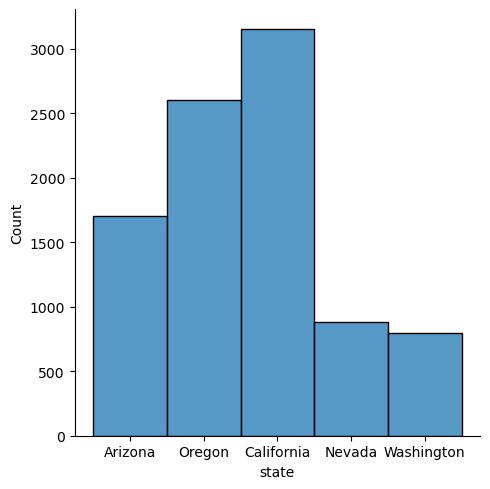

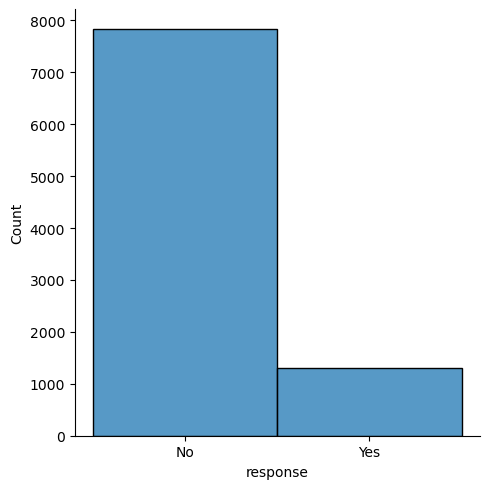

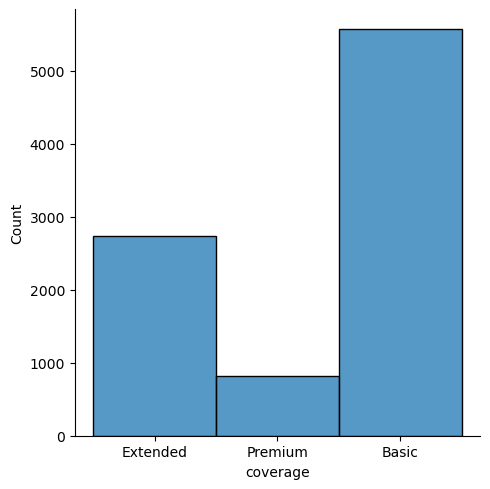

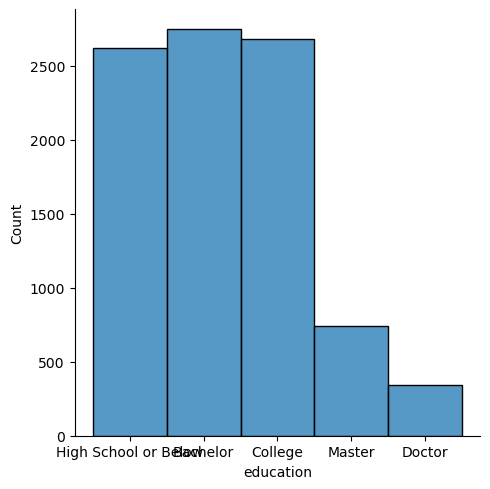

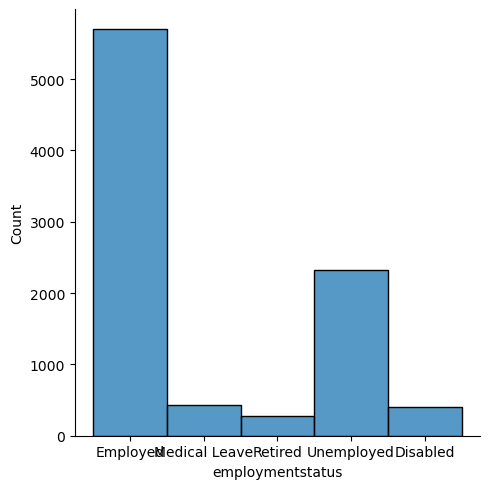

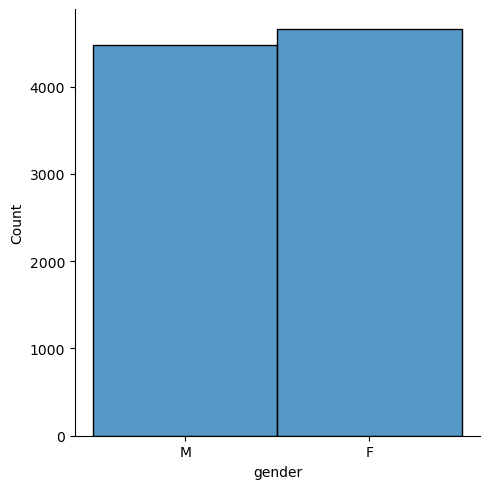

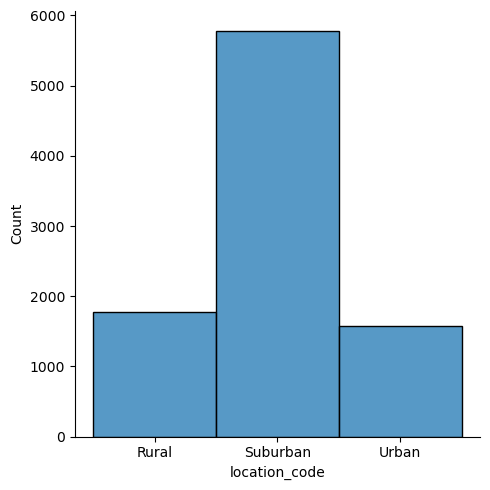

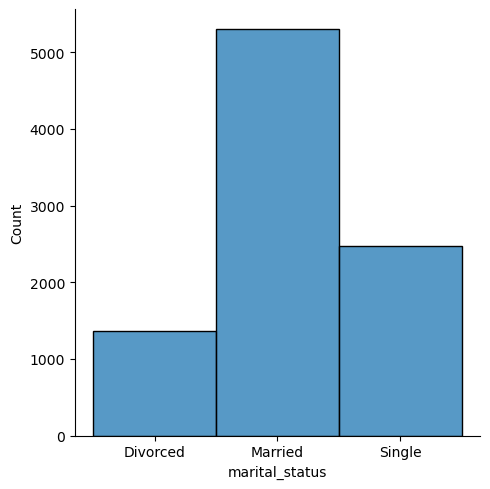

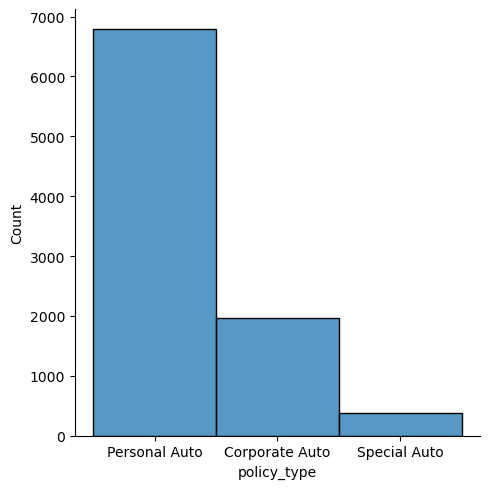

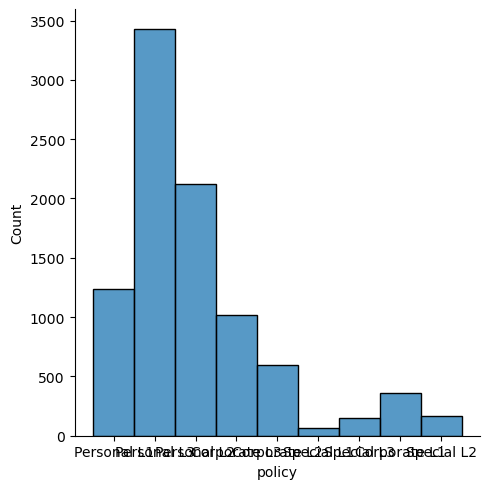

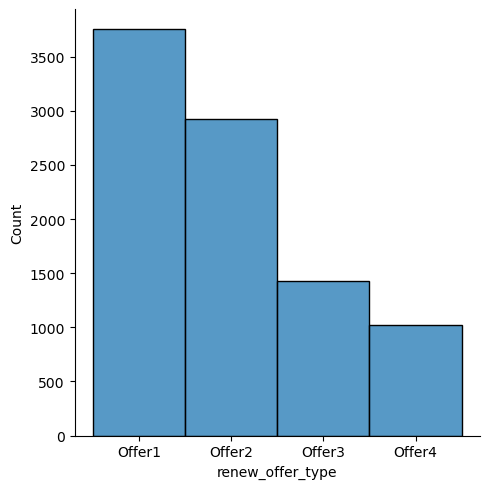

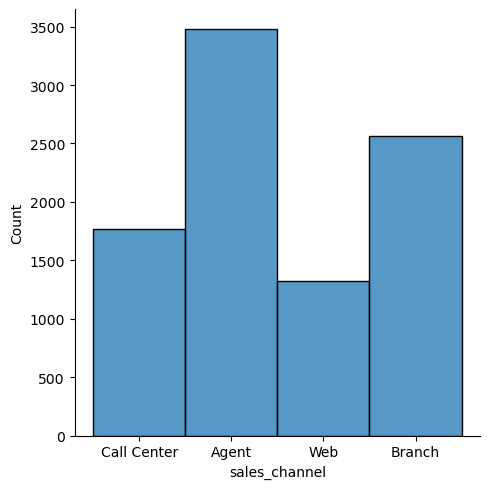

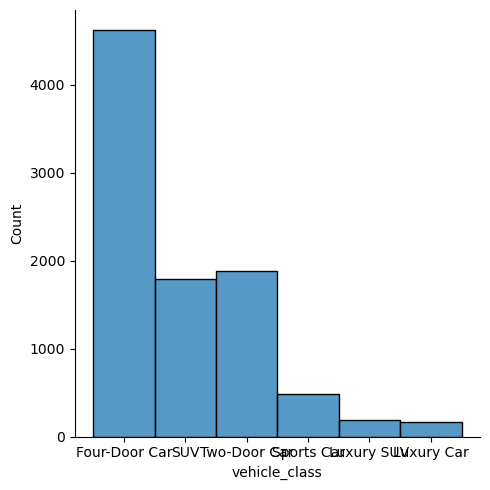

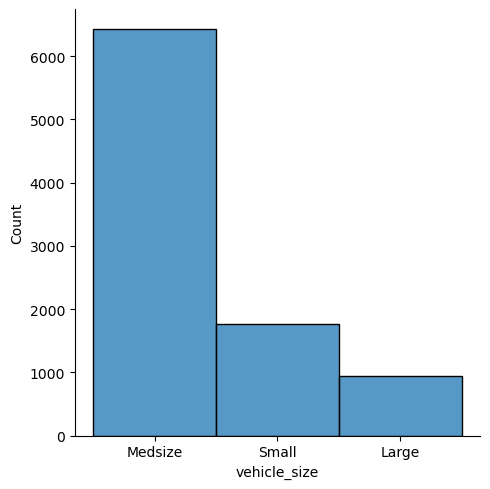

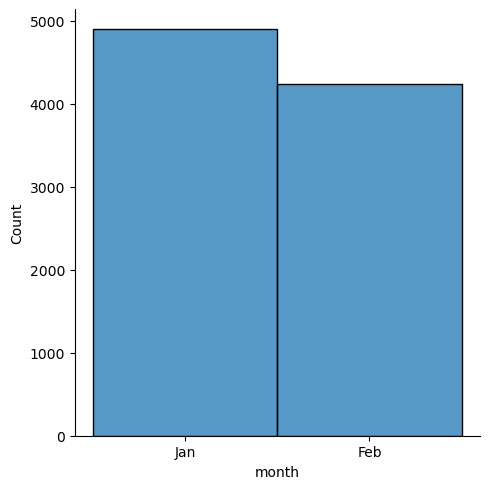

In [661]:
# Variables categoricas
for i in categorical.columns:
  sns.displot(categorical[i])

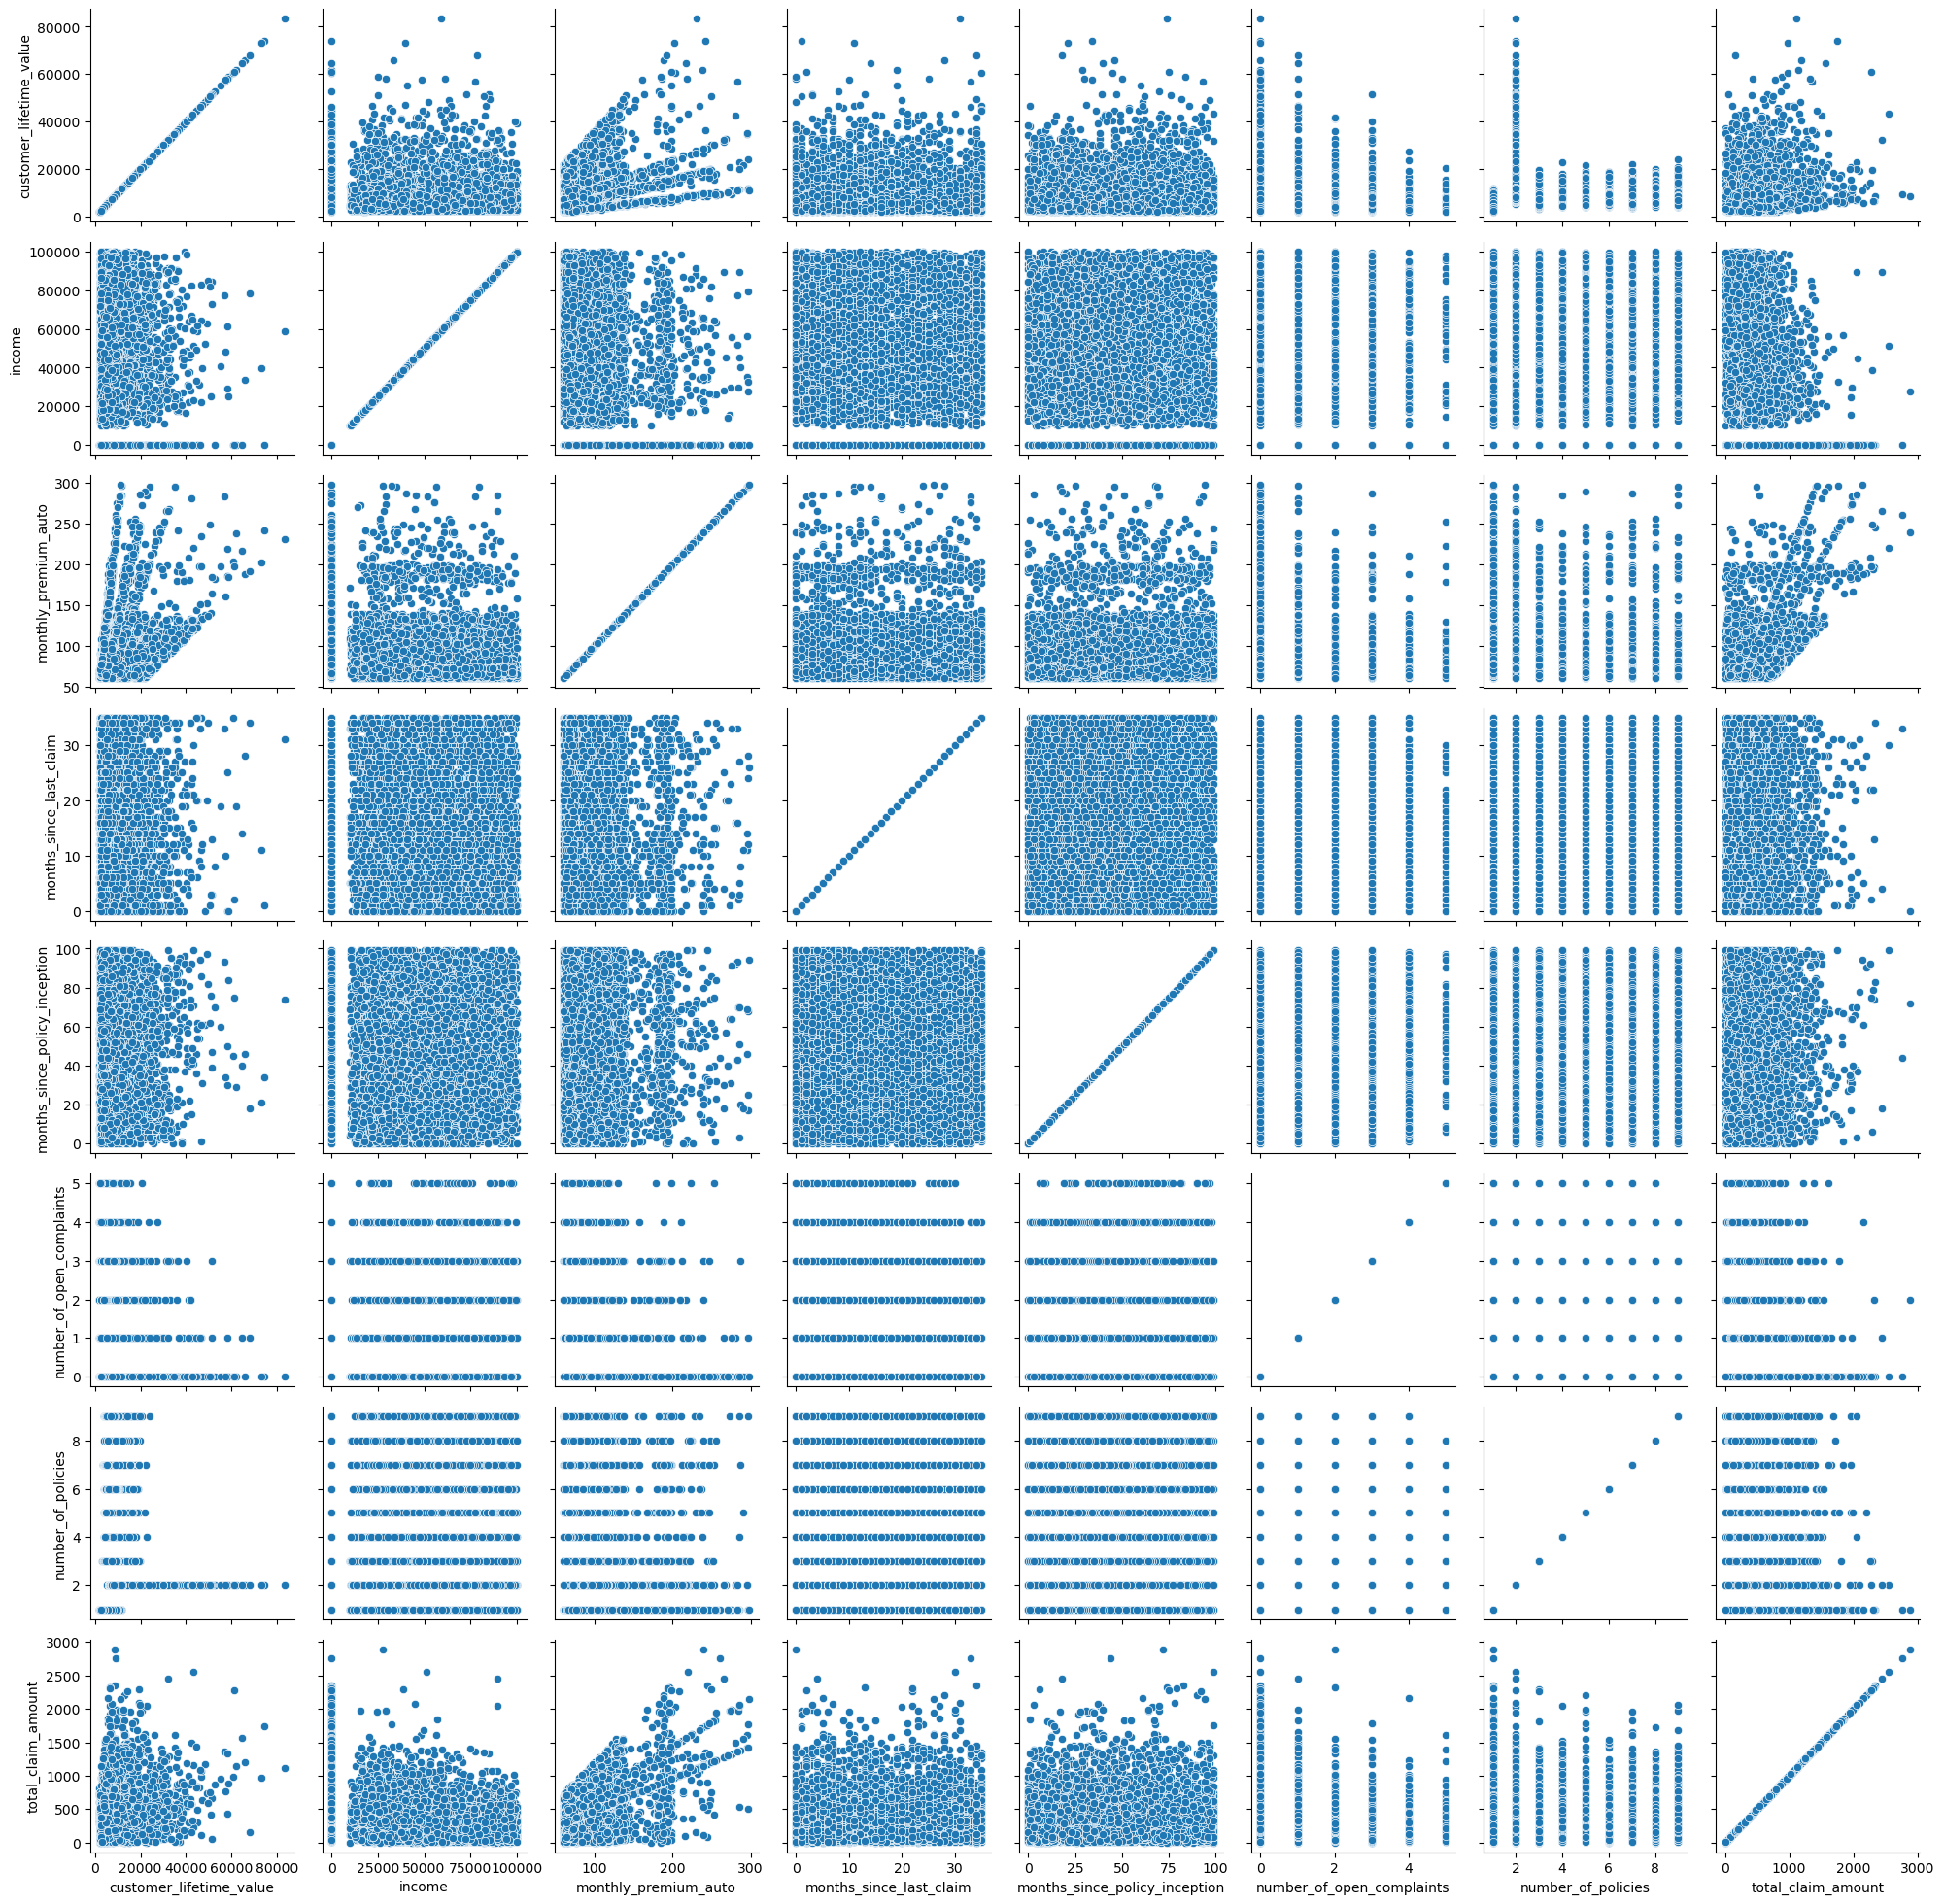

In [662]:
datagrid=sns.PairGrid(numerical)
datagrid.map(sns.scatterplot)

In [663]:
y=numerical['total_claim_amount']
X=numerical.drop(['total_claim_amount'], axis=1)

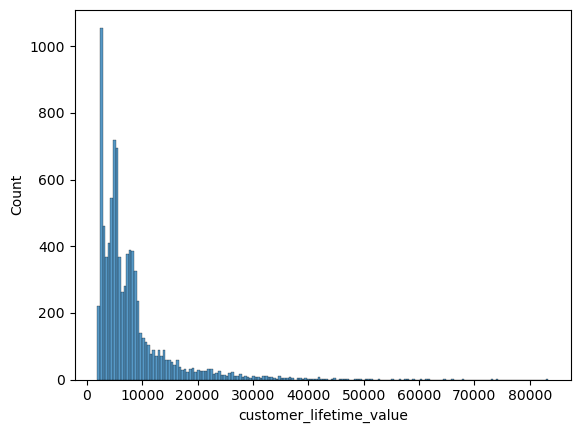

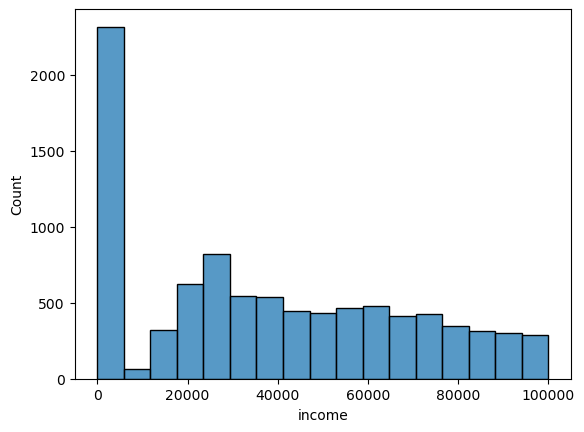

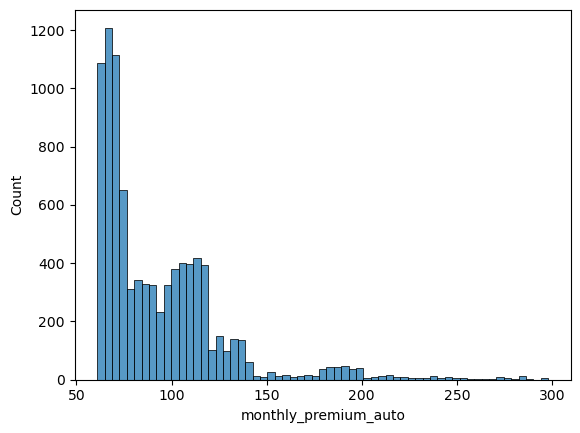

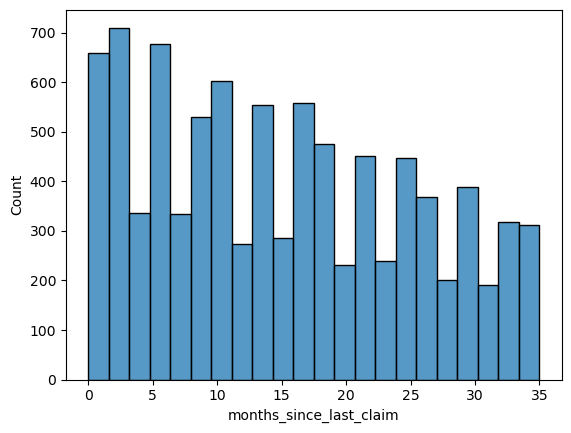

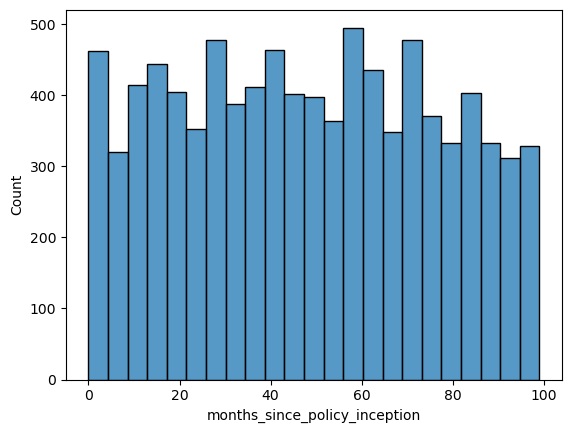

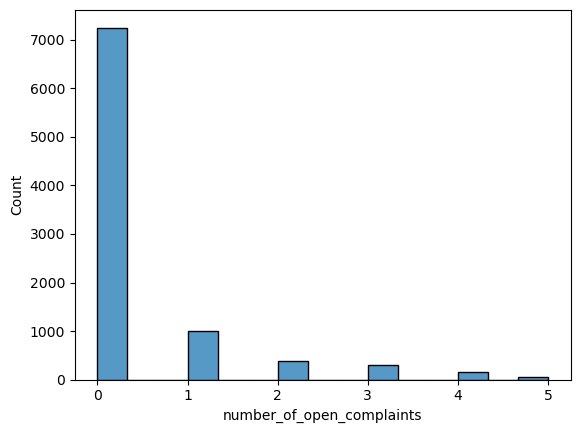

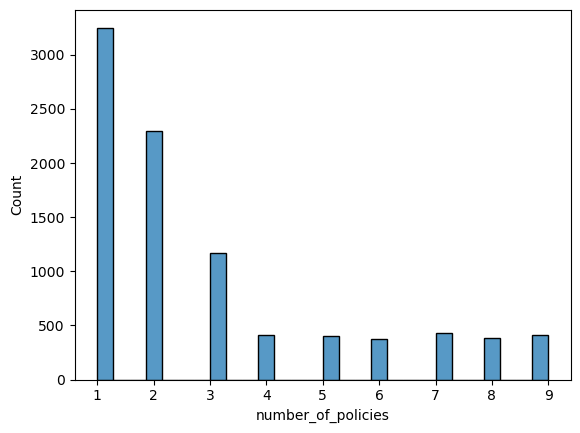

In [664]:
# Variables numericas
for i in range(7):
    sns.histplot(X.iloc[:,i])
    plt.show()


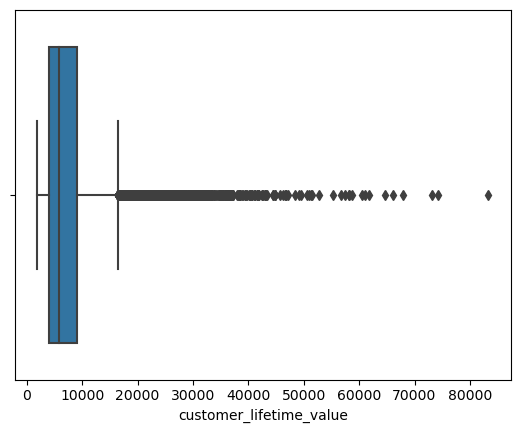

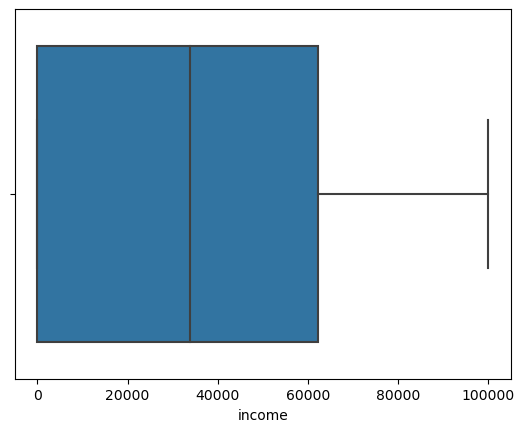

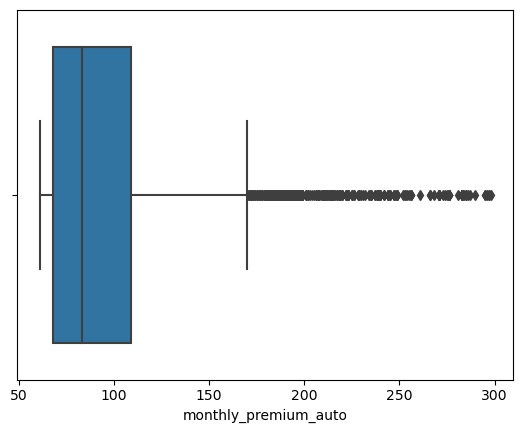

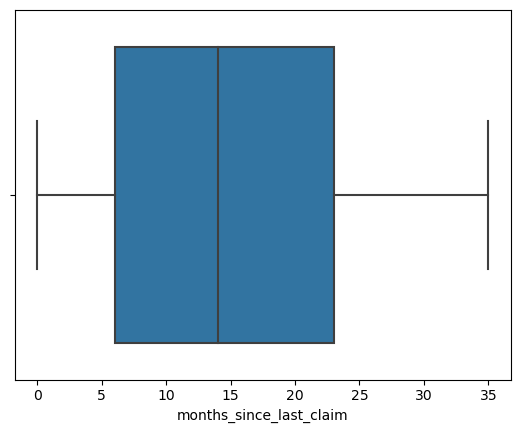

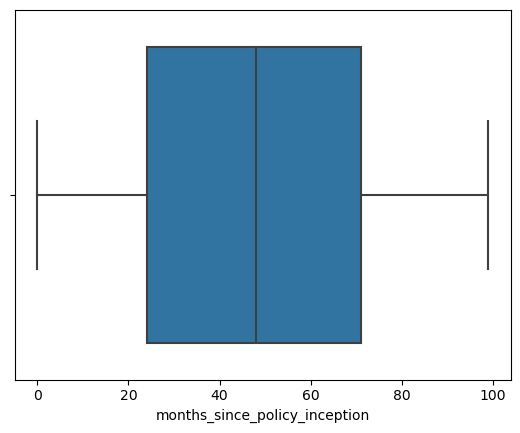

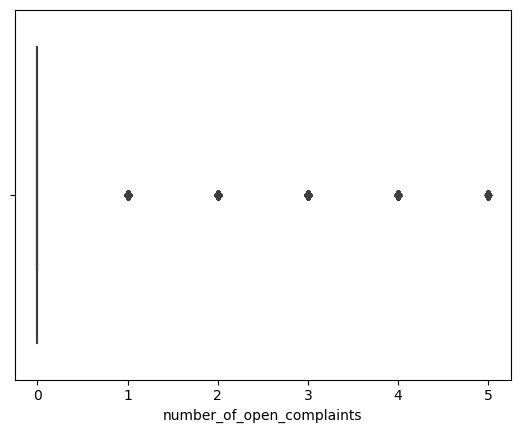

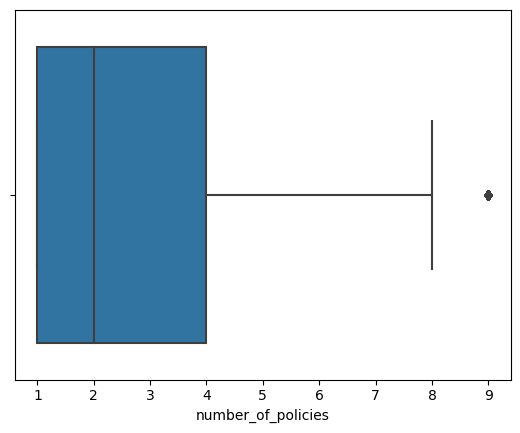

In [665]:
for i in range(7):
    sns.boxplot(X.iloc[:,i])
    plt.show()


 <font color='orange'>04 - Processing Data</font>

In [666]:
# Dealing with outliers

q1=np.percentile(X['customer_lifetime_value'], 25)   
q3=np.percentile(X['customer_lifetime_value'], 75)  

iqr=q3-q1  

upper=q3+3*iqr   
lower=q1-3*iqr  


In [667]:
len(data[data['customer_lifetime_value']<lower])

0

In [668]:
len(data[data['customer_lifetime_value']>upper])

367

In [669]:
y=data['total_claim_amount']
data_x=data.drop(['total_claim_amount'],axis=1)


In [670]:
X_num=data_x.select_dtypes(include=np.number)
X_cat=data_x.select_dtypes(include=np.object)

In [671]:
#Normalizar y Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
datat=trans.fit_transform(X_num)
datat=DataFrame(datat)

In [672]:
# Estandarizar
from sklearn.preprocessing import StandardScaler
transformer=StandardScaler().fit(X_num)
X_stan=transformer.transform(X_num)

data_stand=pd.DataFrame(X_stan) 
data_stand


,0,1,2,3,4,5,6
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648
...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154


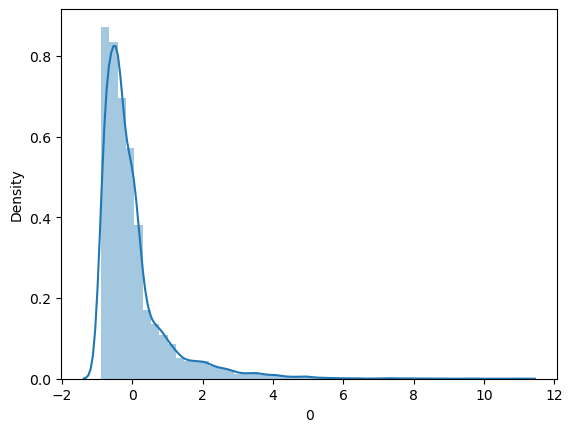

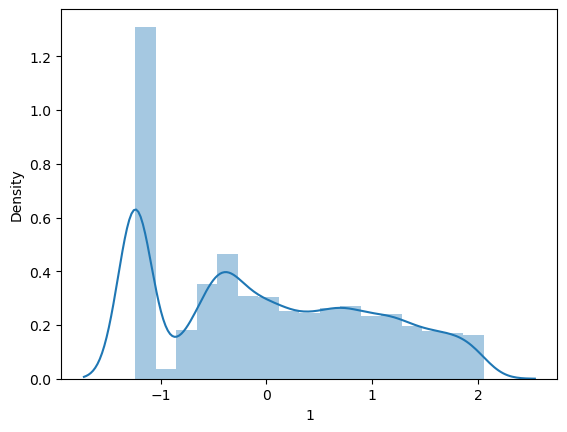

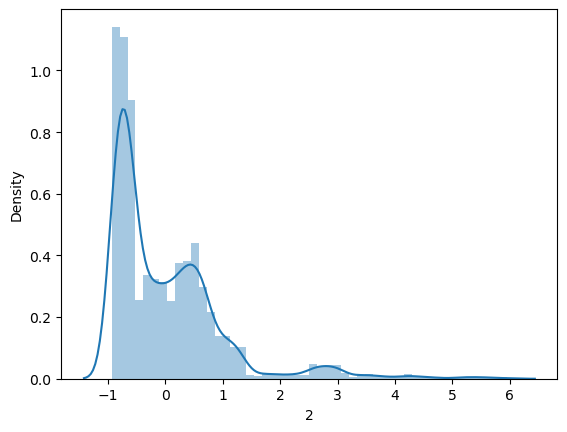

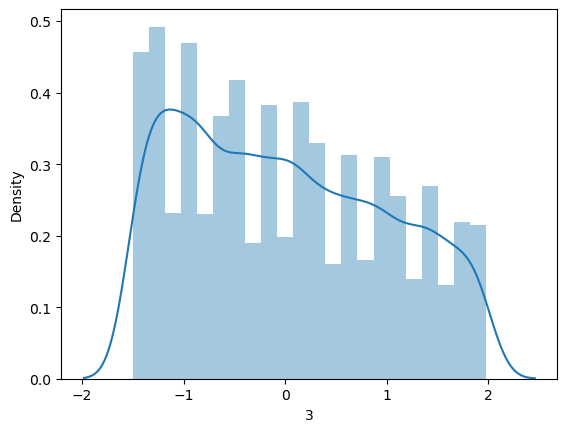

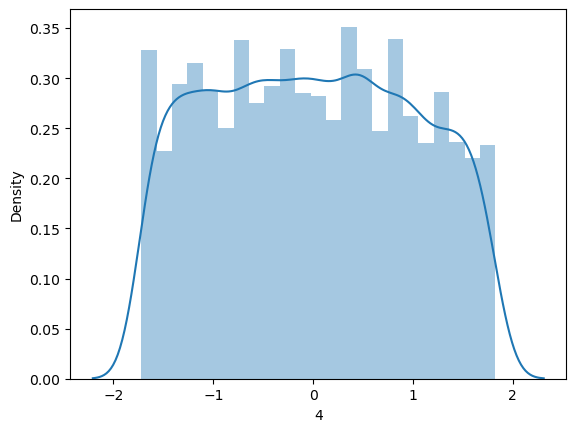

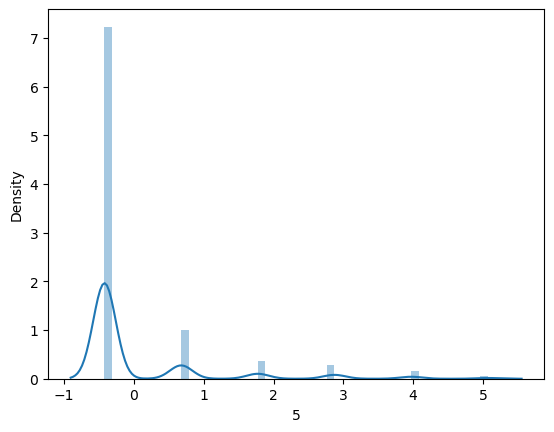

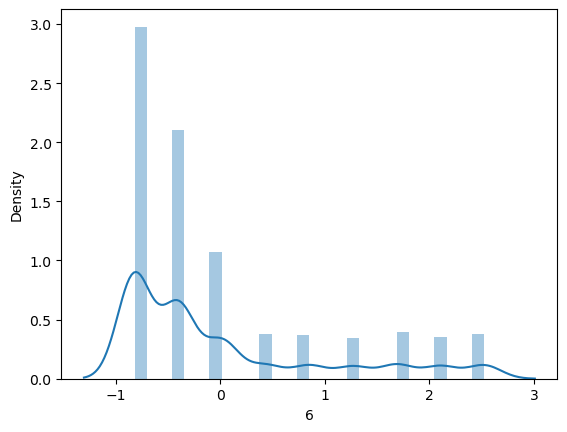

In [673]:
for i in range(7):
    sns.distplot(data_stand.iloc[:,i])
    plt.show()

In [674]:
# Encoding Categorical Data.
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first').fit(categorical)
encoder=encoder.transform(categorical).toarray()
categorical=DataFrame(encoder)
categorical

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9130,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9131,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9132,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


<font color='orange'> Concatenamos las variables numericas y categoricas </font>

In [675]:
X=np.concatenate((data_stand,categorical),axis=1)
X=DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [676]:
# checking shape
print(X.shape)
print(y.shape)

(9134, 51)
(9134,)


In [677]:
# Splitting into train set and test set.
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=40)

In [678]:
# Linear Regression

from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)   # model prediction

In [679]:
train_score=linreg.score(X_train, y_train) #R2
test_score=linreg.score(X_test, y_test)
print (train_score, test_score)

0.521683007559115 0.5144997547683181


In [680]:
from sklearn.metrics import mean_squared_error as mse

train_mse=mse(linreg.predict(X_train), y_train) #MSE
test_mse=mse(y_pred_linreg, y_test)

print (train_mse, test_mse)

40789.294839573675 39227.10308820567


In [681]:
train_rmse=mse(linreg.predict(X_train), y_train)**0.5 #RMSE
test_rmse=mse(y_pred_linreg, y_test)**0.5

print (train_rmse, test_rmse)

201.9635978080547 198.0583325391933


In [682]:
from sklearn.metrics import mean_absolute_error as mae
train_mae=mae(linreg.predict(X_train), y_train) #MAE
test_mae=mae(y_pred_linreg, y_test)

print (train_mae, test_mae)

144.98506530083483 140.41009512994435
